# Spam Classification Project


## Problem Statement:

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or Spam.

### What is a Spam Filtering?

Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

### This corpus has been collected from free or free for research sources at the Internet

A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 

A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 

## Import library:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [3]:
import chardet
with open('spam.csv' , 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}

In [4]:
data= pd.read_csv('spam.csv',encoding='Windows-1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"type", "v2":"massage_body"})

#### Observations:

The dataset has 5572 rows and 2 columns. Primarily it has 5 columns where 3 columns are unnecessary. After deleting those 3 columns, finally this dataset has 2 columns named v1 and v2. Later rename the columns as type and massage_body.

In [7]:
data.sample(n=5)

,type,massage_body
5501,spam,PRIVATE! Your 2003 Account Statement for 07808...
5123,ham,"Hi Chikku, send some nice msgs"
123,ham,I am going to sao mu today. Will be done only ...
2880,ham,Printer is cool. I mean groovy. Wine is groovying
5504,ham,Wait . I will msg after &lt;#&gt; min.


In [8]:
data.type.value_counts()

ham     4825
spam     747
Name: type, dtype: int64

#### Observations:

Maximum massages are ham that it they are not spam.

In [9]:
data.describe()

,type,massage_body
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
print('No. of Rows of test dataset :',data.shape[0])
print('No. of Columns of test dataset :',data.shape[1])

No. of Rows of test dataset : 5572
No. of Columns of test dataset : 2


In [11]:
data.isin([' --','null','NA',' ']).sum().any()

False

In [12]:
data.isnull().sum()

type            0
massage_body    0
dtype: int64

#### Observations:

' --', 'null', 'NA', '  ' are not present in the dataset.

### Encoding type dataset as ham =0 and spam =1:

In [13]:
data.loc[:,'type'] = data.type.map({'ham':0, 'spam':1})
data.head()

,type,massage_body
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Observations:

Here ‘type’ dataset is object datatype. Let’s encoded the type columns as ham=0 and spam =1 for further progress.

### Determine massage length:

In [14]:
data['length_before_cleaning'] = data['massage_body'].str.len()
data.head()

,type,massage_body,length_before_cleaning
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
data['length_before_cleaning'].min()

2

In [16]:
data['length_before_cleaning'].max()

910

In [17]:
data['length_before_cleaning'].median()

61.0

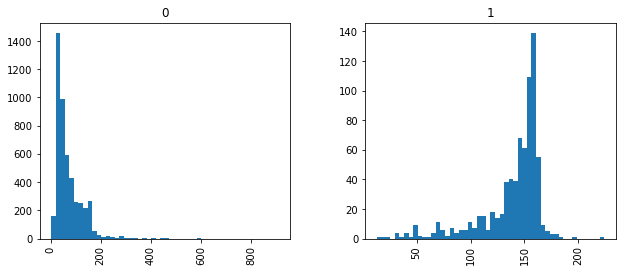

In [18]:
data.hist(column='length_before_cleaning', by='type', bins=50,figsize=(10,4))
plt.show()

In [19]:
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
import requests
from nltk.corpus import words
from sklearn.feature_extraction.text import CountVectorizer 

In [38]:
allmassage=[] # initialize empty list for adding all text messages
for i in range(0, 5572):
    ps=PorterStemmer()
    message=data['massage_body'][i]
    message=re.sub('[^a-zA-Z]',' ', message)
    message=re.sub(r'\d+', '', message)
    message=message.lower()
    message=message.split()
    message=[ps.stem(word) for word in message if not word in set(stopwords.words('english')+ ['u','ur','4','2','im','dont','doin','I','numbr','YOU','You','A','If'])]
    message=' '.join(message)
    allmassage.append(message)

In [39]:
data['after_cleaning']=allmassage

In [41]:
data['length_after_cleaning'] = data['after_cleaning'].str.len()
data.head()

,type,massage_body,length_before_cleaning,after_cleaning,length_after_cleaning
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif oni,19
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,99
3,0,U dun say so early hor... U c already then say...,49,dun say earli hor c alreadi say,31
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36


In [42]:
# Total length removal
print ('Origial Length', data.length_before_cleaning.sum())
print ('Clean Length', data.length_after_cleaning.sum())

Origial Length 446422
Clean Length 250954


In [43]:
def plot_distributions(df,col):
    f,ax = plt.subplots(1,2,figsize = (10,6))

    sns.distplot(data[data['type']==1][col],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

    ax[0].set_xlabel('Spam sms length')
    ax[0].legend()

    sns.distplot(data[data['type']==0][col],bins=20,ax=ax[1],label='ham messages distribution')
    ax[1].set_xlabel('ham sms length')
    ax[1].legend()

    plt.show()

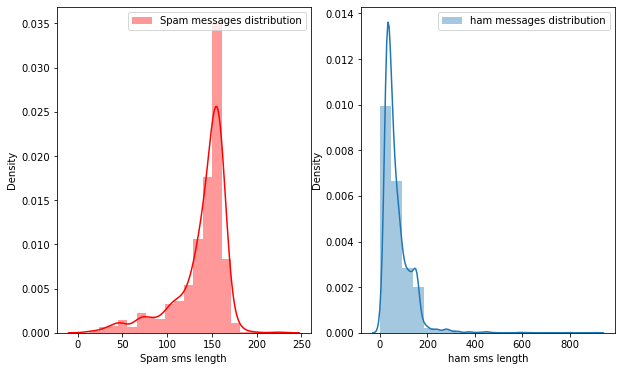

In [44]:
plot_distributions(data,'length_before_cleaning')

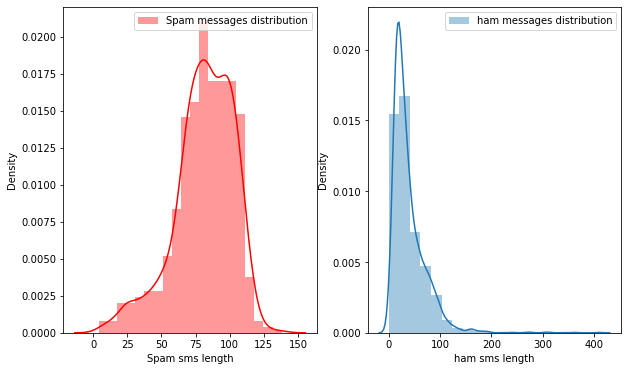

In [45]:
plot_distributions(data,'length_after_cleaning')

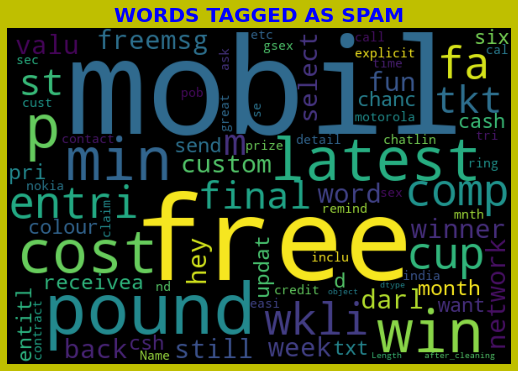

In [46]:
from wordcloud import WordCloud
spam = data['after_cleaning'][data['type']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black', max_words=200).generate(str(spam))
plt.figure(figsize=(7,5),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS SPAM',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'blue'})
plt.show()

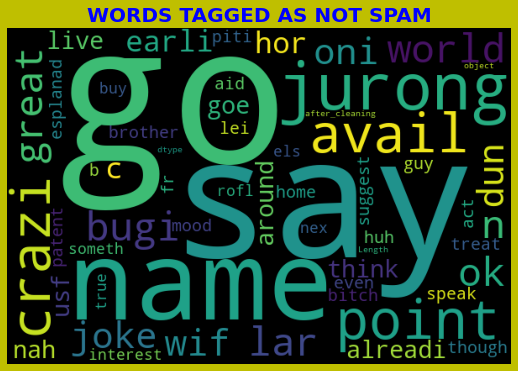

In [47]:
from wordcloud import WordCloud
notspam = data['after_cleaning'][data['type']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='black', max_words=200).generate(str(notspam))
plt.figure(figsize=(7,5),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS NOT SPAM',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'blue'})
plt.show()

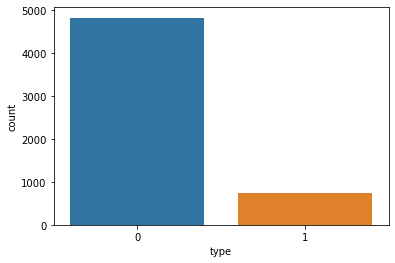

In [48]:
sns.countplot(x="type" , data = data)
plt.show()

## Machine learning model building (Classification Model):

**Here target variable is wheater the comment is negetive comments or not. So it is a binary data and the problem is classification problem.**

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(data['after_cleaning']).toarray() # prepare feature valirable

y=data.iloc[:,0] # prepare target variable

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.naive_bayes import MultinomialNB

acc_max=0
random_max=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    naive = MultinomialNB()
    naive.fit(x_train, y_train)
    y_pred=naive.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.9838516746411483 on Random_state 8


**Here for Random_state=8, the accuracy is maximum. So let's take it.**

In [67]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (3900, 6221)
Training target shape: (3900,)
Test feature shape: (1672, 6221)
Test target shape: (1672,)


### 1. Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state= 8)
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))
print("-----------")
print("-----------")
print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.9856459330143541
cof_mat:
  [[1447    3]
 [  21  201]]
classification report:
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1450
           1       0.99      0.91      0.94       222

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672

-----------
-----------
training score :  0.9953846153846154
testing score :  0.9856459330143541


### 2.	DecisionTree Classifier:

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.9700956937799043


cof_mat:  [[1425   25]
 [  25  197]]


classification report: 

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1450
           1       0.89      0.89      0.89       222

    accuracy                           0.97      1672
   macro avg       0.94      0.94      0.94      1672
weighted avg       0.97      0.97      0.97      1672

-----------
-----------
training score :  1.0
testing score :  0.9700956937799043


### 3. Gradient Boosting Classifier:

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.9688995215311005


cof_mat:  [[1447    3]
 [  49  173]]


classification report: 

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1450
           1       0.98      0.78      0.87       222

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

-----------
-----------
training score :  0.9784615384615385
testing score :  0.9688995215311005


### 4.	MultinomialNB:

In [71]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(x_train, y_train)

y_pred = naive.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', naive.score(x_train, y_train))
print('testing score : ', naive.score(x_test, y_test))

accu score :  0.9850478468899522


cof_mat:  [[1433   17]
 [   8  214]]


classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1450
           1       0.93      0.96      0.94       222

    accuracy                           0.99      1672
   macro avg       0.96      0.98      0.97      1672
weighted avg       0.99      0.99      0.99      1672

-----------
-----------
training score :  0.9915384615384616
testing score :  0.9850478468899522


#### Observations:

Here for Naive bayes, Logistic Regression is the better models.

### AUC-ROC Curve:

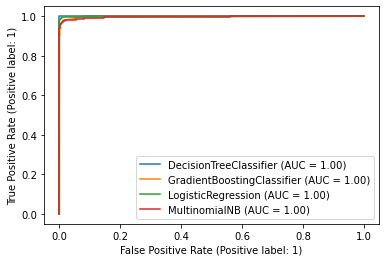

In [72]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_train, y_train)
plot_roc_curve(gbdt, x_train, y_train, ax=disp.ax_)
plot_roc_curve(log, x_train, y_train, ax=disp.ax_)
plot_roc_curve(naive, x_train, y_train, ax=disp.ax_)
plt.show()

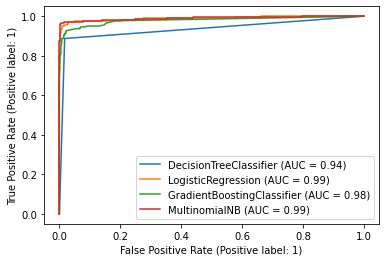

In [73]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_test, y_test)

plot_roc_curve(log, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbdt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(naive, x_test, y_test, ax=disp.ax_)
plt.show()

#### Observations:
Here for Naive bayes, Logistic Regression the AUC score is same.

Here we take Naive bayes for final model. **So it is the final model for this dataset.**

### Hyperparameter tuning for final model:

In [52]:
from sklearn.model_selection import GridSearchCV
grid = dict(alpha=[1, 0.5,0.0001,0.001],fit_prior=[True, False])

grid_naive = GridSearchCV(estimator=naive, param_grid= grid,refit = True)

grid_naive.fit(x_train, y_train)
print('best params : ', grid_naive.best_params_)

best params :  {'alpha': 1, 'fit_prior': True}


#### Observations:

Here accuracy score is not improved after using hyper parameter tuning.

## Final Model

In [75]:
grid_naive_best = grid_naive.best_estimator_
grid_naive_best.fit(x_train, y_train)

y_pred = grid_naive_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print('training score : ', naive.score(x_train, y_train))
print('testing score : ', naive.score(x_test, y_test))

accu score :  0.9850478468899522
cof_mat:

  [[1433   17]
 [   8  214]]
classification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1450
           1       0.93      0.96      0.94       222

    accuracy                           0.99      1672
   macro avg       0.96      0.98      0.97      1672
weighted avg       0.99      0.99      0.99      1672



### Confusion matrix:

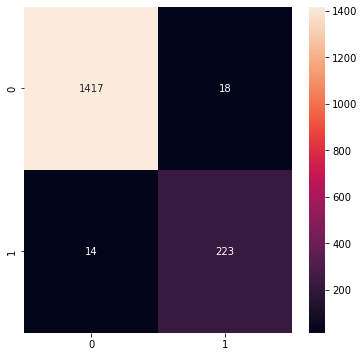

In [53]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

### Save the model for future use:

In [57]:
import pickle
pickle.dump(grid_naive_best, open("Spam_SMS_Classification_model", "wb"))
load_Spam_SMS_Classification_model= pickle.load(open("Spam_SMS_Classification_model", "rb"))

In [62]:
y_pred = load_Spam_SMS_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
1070,0,1
27,0,0
522,1,1
193,0,0
1621,0,0
474,1,1


## Thank You